In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras import layers, models, optimizers, losses, metrics, initializers, regularizers, constraints, activations
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from google.colab import files
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import kagglehub

# Use the full versioned handle as a string
trashData = kagglehub.dataset_download("amankamath/Ocean-Garbage1")

print("Path to dataset files:", trashData)


Path to dataset files: /kaggle/input/ocean-garbage1


In [ ]:
pip install cleanvision cleanlab[all] torch torchvision

Reading images from /kaggle/input/ocean-garbage1
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

Issue checks completed. 18 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           14 |
|  1 | blurry           |            4 |
|  2 | dark             |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | light            |            0 |
|  5 | low_information  |            0 |
|  6 | grayscale        |            0 |
|  7 | odd_size         |            0 |
|  8 | exact_duplicates |            0 | 

------------------ near_duplicates images ------------------

Number of examples with this issue: 14
Examples representing most severe instances of this issue:

Set: 0


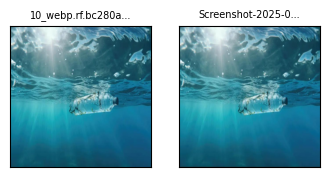

Set: 1


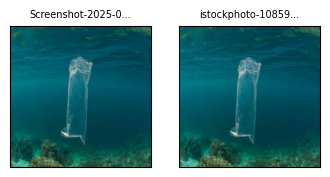

Set: 2


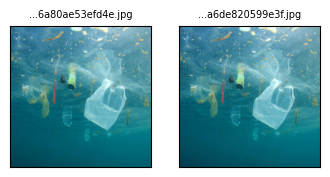

Set: 3


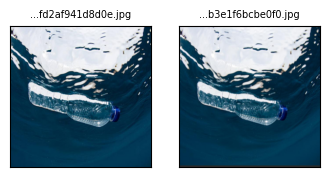

---------------------- blurry images -----------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



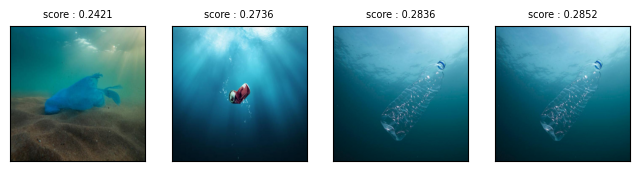

In [ ]:
from cleanvision import Imagelab

imagelab = Imagelab(data_path="/kaggle/input/ocean-garbage1")
imagelab.find_issues()
imagelab.report()

In [ ]:
summary = imagelab.issue_summary
print(summary)

         issue_type  num_images
0   near_duplicates          14
1            blurry           4
2              dark           0
3  odd_aspect_ratio           0
4             light           0
5   low_information           0
6         grayscale           0
7          odd_size           0
8  exact_duplicates           0


Reading images from /kaggle/working/ocean-garbage1
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

Issue checks completed. 18 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           14 |
|  1 | blurry           |            4 |
|  2 | dark             |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | light            |            0 |
|  5 | low_information  |            0 |
|  6 | grayscale        |            0 |
|  7 | odd_size         |            0 |
|  8 | exact_duplicates |            0 | 

------------------ near_duplicates images ------------------

Number of examples with this issue: 14
Examples representing most severe instances of this issue:

Set: 0


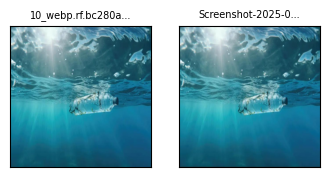

Set: 1


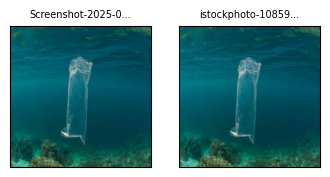

Set: 2


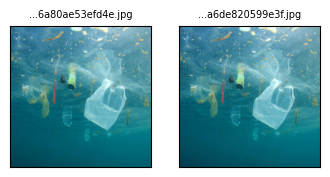

Set: 3


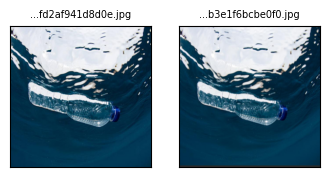

---------------------- blurry images -----------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



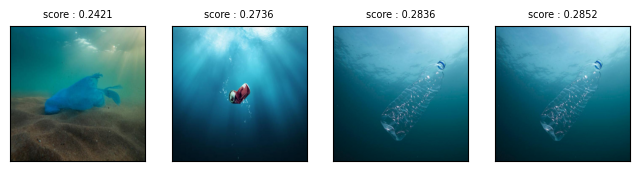

None


In [ ]:
import os
import shutil
from cleanvision import Imagelab

# Step 1: Copy dataset to working directory so we can modify it
SOURCE_DIR = "/kaggle/input/ocean-garbage1"
WORKING_DIR = "/kaggle/working/ocean-garbage1"

if not os.path.exists(WORKING_DIR):
    shutil.copytree(SOURCE_DIR, WORKING_DIR)

# Step 2: Run CleanVision on copied data
imagelab = Imagelab(data_path=WORKING_DIR)
imagelab.find_issues()
print(imagelab.report())

issues = imagelab.issues  # DataFrame

# Step 3: Define and apply removal mask
remove_mask = (
    issues['is_dark_issue'] |
    issues['is_light_issue'] |
    issues['is_low_information_issue'] |
    issues['is_odd_aspect_ratio_issue']
)

for path in issues.index[remove_mask]:
    if os.path.exists(path):
        os.remove(path)

# Step 4: Remove duplicate images
dup_sets = []
for key in ('exact_duplicates', 'near_duplicates'):
    if key in imagelab.info and 'sets' in imagelab.info[key]:
        dup_sets.extend(imagelab.info[key]['sets'])

for cluster in dup_sets:
    for path in cluster[1:]:  # Keep the first image
        if os.path.exists(path):
            os.remove(path)


Reading images from /kaggle/input/ocean-garbage1
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

Issue checks completed. 18 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           14 |
|  1 | blurry           |            4 |
|  2 | dark             |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | light            |            0 |
|  5 | low_information  |            0 |
|  6 | grayscale        |            0 |
|  7 | odd_size         |            0 |
|  8 | exact_duplicates |            0 | 

------------------ near_duplicates images ------------------

Number of examples with this issue: 14
Examples representing most severe instances of this issue:

Set: 0


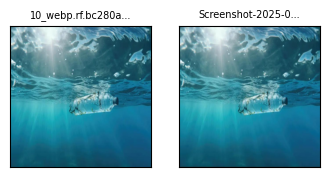

Set: 1


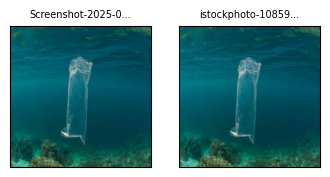

Set: 2


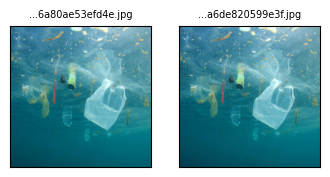

Set: 3


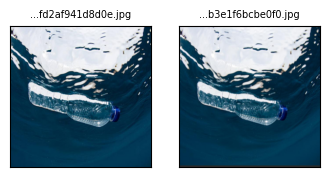

---------------------- blurry images -----------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



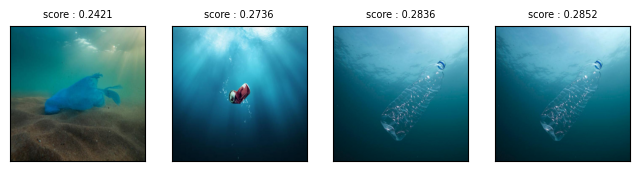

None


In [ ]:
imagelab = Imagelab(data_path=DATA_DIR)
imagelab.find_issues()
print(imagelab.report())


In [ ]:
!pip install ultralytics

In [ ]:
!pip install albumentations==1.3.1 opencv-python-headless

In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# === Paths ===
IMG_DIR = "/kaggle/input/ocean-garbage1/train/images"
LABEL_DIR = "/kaggle/input/ocean-garbage1/train/labels"
OUT_IMG_DIR = "/kaggle/working/aug_images"
OUT_LABEL_DIR = "/kaggle/working/aug_labels"

os.makedirs(OUT_IMG_DIR, exist_ok=True)
os.makedirs(OUT_LABEL_DIR, exist_ok=True)

# === Print original image count ===
original_images = [f for f in os.listdir(IMG_DIR) if f.endswith((".jpg", ".png", ".jpeg"))]
print("Original image count:", len(original_images))

# === Albumentations bbox format and params ===
bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels'], min_area=0, min_visibility=0)

# === Define augmentation pipeline with randomness ===
base_augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.OneOf([
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
        A.RandomGamma(gamma_limit=(80,120), p=0.7),
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, p=0.7),
    ], p=0.8),
    A.OneOf([
        A.MotionBlur(blur_limit=5, p=0.4),
        A.GaussianBlur(blur_limit=5, p=0.4),
        A.MedianBlur(blur_limit=5, p=0.3),
    ], p=0.5),
    A.Rotate(limit=[90, 90], p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.0625,
        scale_limit=0.1,
        rotate_limit=0,
        border_mode=cv2.BORDER_REFLECT_101,
        p=0.5
    ),
    A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=0.3),
    A.RandomShadow(p=0.3),
    A.RandomSunFlare(p=0.2),
], bbox_params=bbox_params)

# === Augmentation loop ===
for img_file in tqdm(original_images):
    img_path = os.path.join(IMG_DIR, img_file)
    label_file = os.path.splitext(img_file)[0] + ".txt"
    label_path = os.path.join(LABEL_DIR, label_file)

    # Read image
    image = cv2.imread(img_path)
    if image is None:
        continue

    # Read labels
    with open(label_path, "r") as f:
        lines = f.readlines()

    bboxes = []
    classes = []
    for line in lines:
        cls, x, y, w, h = map(float, line.strip().split())
        bboxes.append([x, y, w, h])
        classes.append(int(cls))

    # Create 15 diverse augmentations per image
    for i in range(15):
        transformed = base_augment(image=image, bboxes=bboxes, class_labels=classes)

        aug_img = transformed["image"]
        aug_bboxes = transformed["bboxes"]
        aug_classes = transformed["class_labels"]

        if len(aug_bboxes) == 0:
            # No boxes left after augmentation — skip saving
            continue

        # Save augmented image
        aug_img_name = f"{os.path.splitext(img_file)[0]}_aug{i}.jpg"
        aug_img_path = os.path.join(OUT_IMG_DIR, aug_img_name)
        cv2.imwrite(aug_img_path, aug_img)

        # Save corresponding label
        aug_label_path = os.path.join(OUT_LABEL_DIR, aug_img_name.replace(".jpg", ".txt"))
        with open(aug_label_path, "w") as f:
            for cls, box in zip(aug_classes, aug_bboxes):
                f.write(f"{cls} {' '.join(map(str, box))}\n")

print("Augmentation completed!")
print("Augmented image count:", len(os.listdir(OUT_IMG_DIR)))
print("Augmented label count:", len(os.listdir(OUT_LABEL_DIR)))


/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/blur/transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


Original image count: 291


100%|██████████| 291/291 [03:43<00:00,  1.30it/s]

Augmentation completed!
Augmented image count: 4365
Augmented label count: 4365


In [ ]:
print("Augmented image count:", len(os.listdir(OUT_IMG_DIR)))
print("Augmented label count:", len(os.listdir(OUT_LABEL_DIR)))


Augmented image count: 4365
Augmented label count: 4365


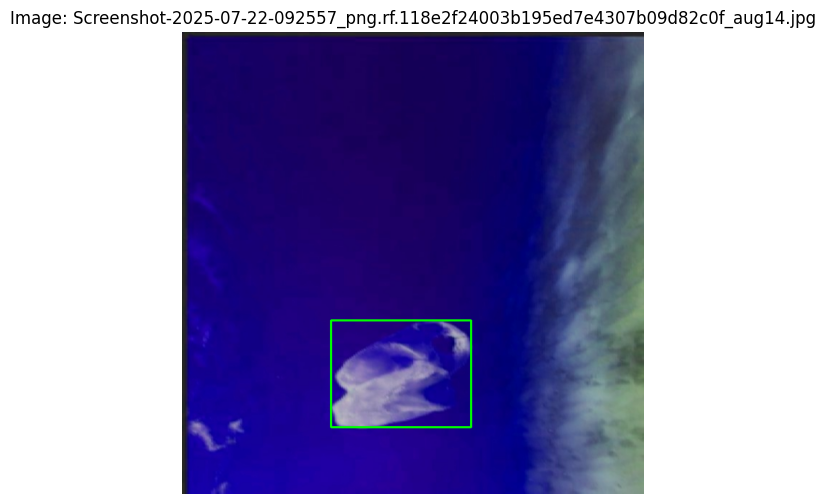

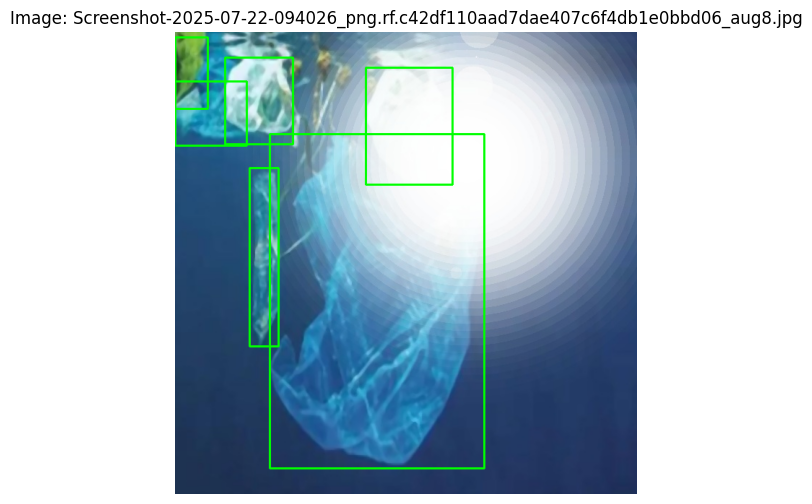

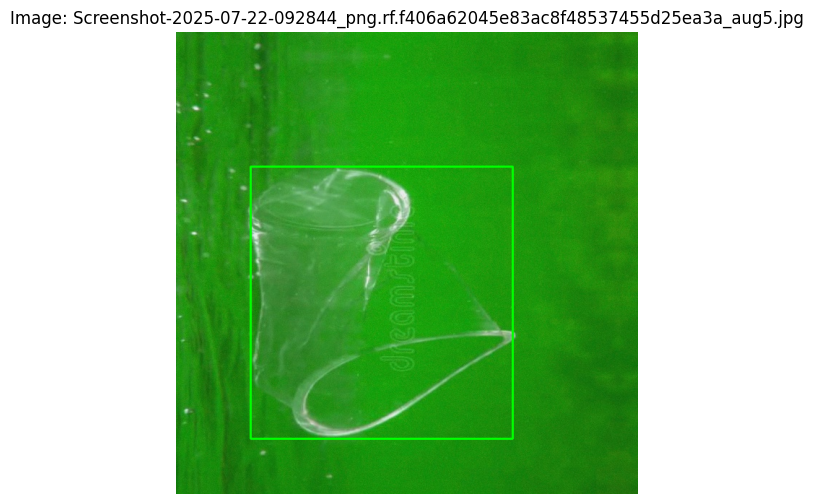

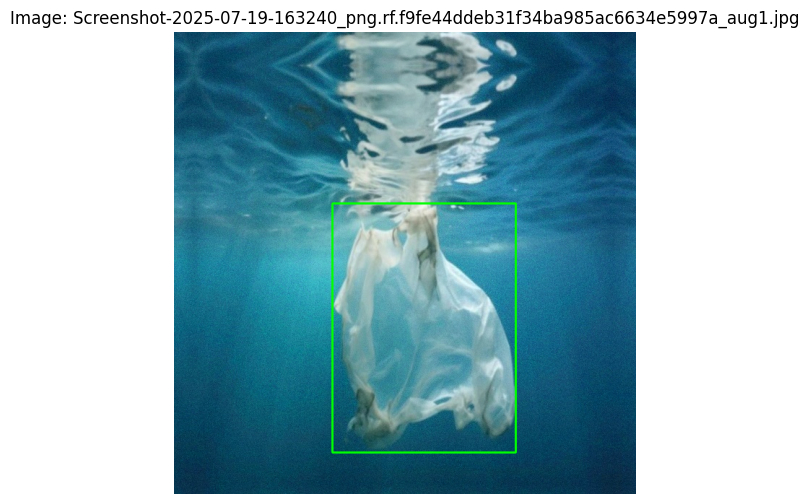

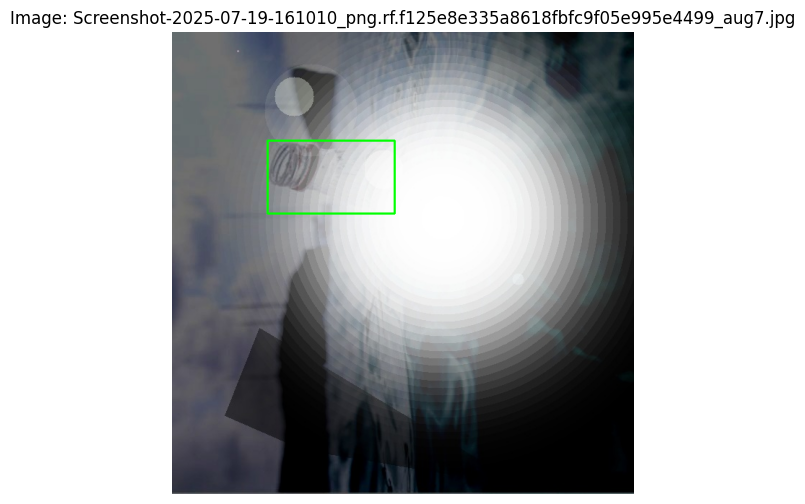

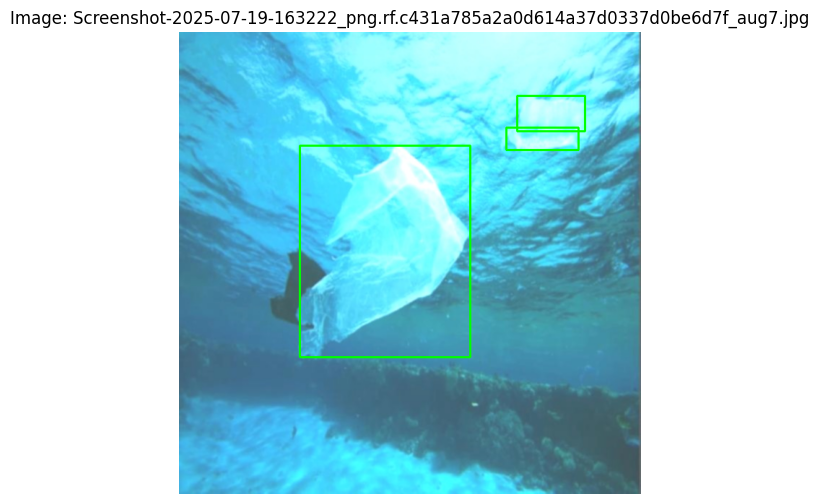

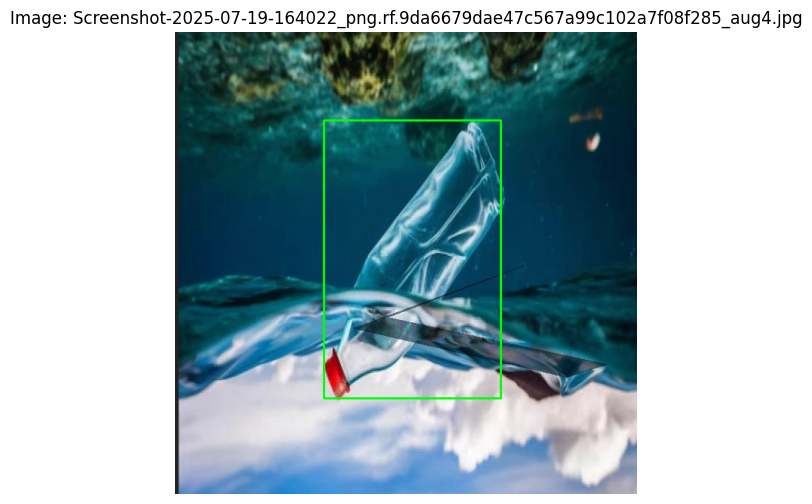

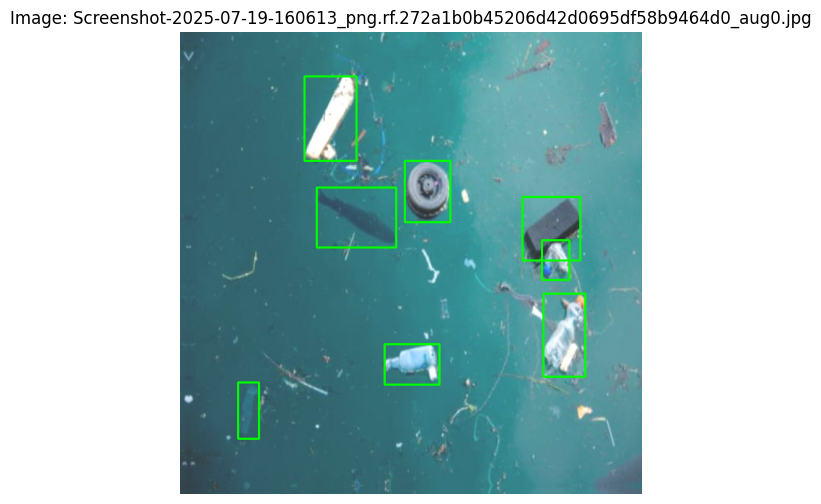

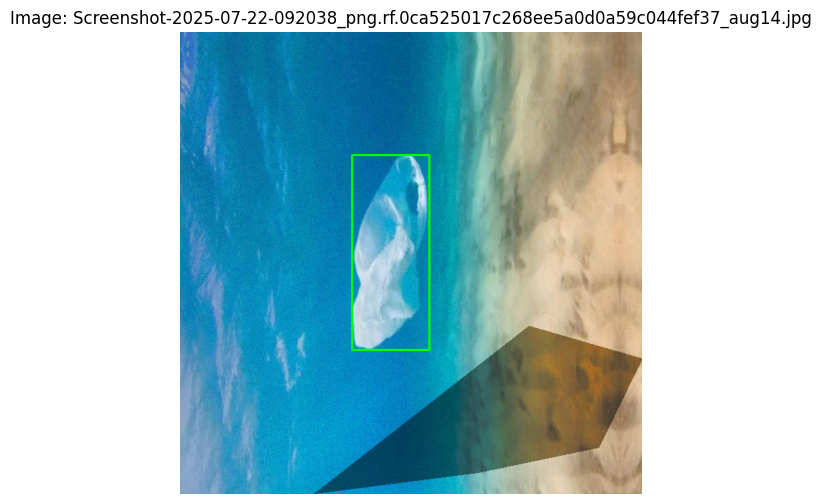

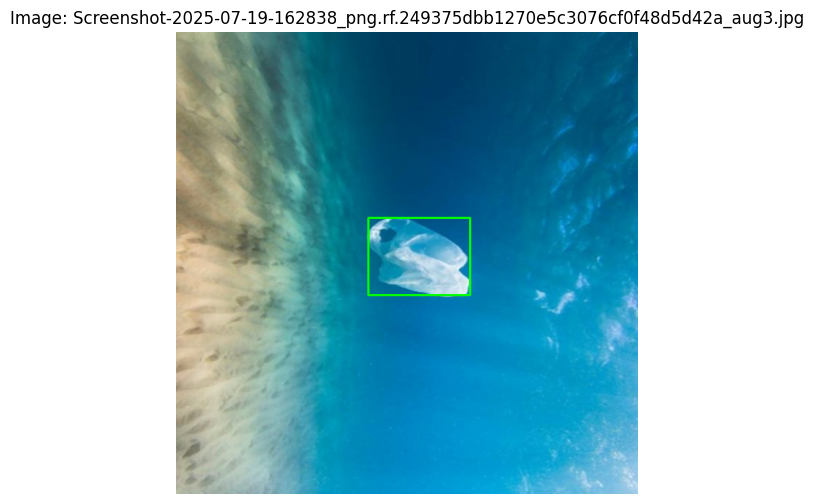

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to your augmented images and labels
IMG_DIR = "/kaggle/working/aug_images"
LABEL_DIR = "/kaggle/working/aug_labels"

# Get list of all images
image_files = [f for f in os.listdir(IMG_DIR) if f.endswith(('.jpg', '.png'))]

# Pick 10 random images
sample_images = random.sample(image_files, 10)

def draw_boxes(img, boxes):
    h, w, _ = img.shape
    for box in boxes:
        cls, x_center, y_center, width, height = box
        cls = int(cls)
        # Convert from YOLO to pixel coords
        x_min = int((x_center - width/2) * w)
        y_min = int((y_center - height/2) * h)
        x_max = int((x_center + width/2) * w)
        y_max = int((y_center + height/2) * h)
        # Draw rectangle (green for class 0, red for class 1)
        color = (0,255,0) if cls == 0 else (255,0,0)
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)
    return img

for img_file in sample_images:
    # Read image
    img_path = os.path.join(IMG_DIR, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read labels
    label_file = img_file.replace('.jpg', '.txt')
    label_path = os.path.join(LABEL_DIR, label_file)
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls = int(parts[0])
            bbox = list(map(float, parts[1:5]))
            boxes.append([cls] + bbox)

    # Draw bounding boxes
    img_with_boxes = draw_boxes(img.copy(), boxes)

    # Show image
    plt.figure(figsize=(8,6))
    plt.imshow(img_with_boxes)
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()


Reading images from /kaggle/working/aug_images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/4248 [00:00<?, ?it/s]

  0%|          | 0/4248 [00:00<?, ?it/s]

Issue checks completed. 92 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |           82 |
|  1 | dark             |           10 |
|  2 | light            |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | low_information  |            0 |
|  5 | grayscale        |            0 |
|  6 | odd_size         |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 82
Examples representing most severe instances of this issue:



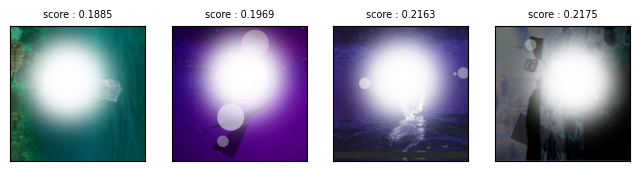

----------------------- dark images ------------------------

Number of examples with this issue: 10
Examples representing most severe instances of this issue:



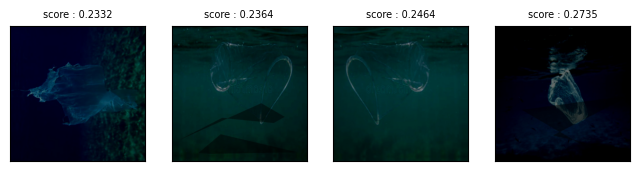

None


In [ ]:
import os
from cleanvision import Imagelab

# --- Paths to image and label directories ---
DATA_DIR = OUT_IMG_DIR        # Folder with images
LABEL_DIR = OUT_LABEL_DIR     # Folder with YOLO label files (.txt)

# --- 1. Run the audit ---
imagelab = Imagelab(data_path=DATA_DIR)
imagelab.find_issues()
print(imagelab.report())

issues = imagelab.issues  # DataFrame with flags and scores

# --- 2. Define removal conditions (bad quality images) ---
remove_mask = (
    issues['is_dark_issue'] |
    issues['is_light_issue'] |
    issues['is_low_information_issue'] |
    issues['is_odd_aspect_ratio_issue'] |
    issues['is_blurry_issue']
)

# --- 3. Remove flagged images + their labels ---
for img_path in issues.index[remove_mask]:
    # Delete image
    if os.path.exists(img_path):
        os.remove(img_path)

    # Delete corresponding label
    img_name = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(LABEL_DIR, img_name + ".txt")
    if os.path.exists(label_path):
        os.remove(label_path)

# --- 4. Remove duplicates (exact + near), keeping 1 per set ---
dup_sets = []
for key in ('exact_duplicates', 'near_duplicates'):
    if key in imagelab.info and 'sets' in imagelab.info[key]:
        dup_sets.extend(imagelab.info[key]['sets'])

for cluster in dup_sets:
    for img_path in cluster[1:]:  # Keep only the first
        # Delete duplicate image
        if os.path.exists(img_path):
            os.remove(img_path)

        # Delete corresponding label
        img_name = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(LABEL_DIR, img_name + ".txt")
        if os.path.exists(label_path):
            os.remove(label_path)


In [ ]:
from cleanvision import Imagelab

imagelab = Imagelab(data_path=OUT_IMG_DIR)
imagelab.find_issues()
imagelab.report()

Reading images from /kaggle/working/aug_images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/4156 [00:00<?, ?it/s]

  0%|          | 0/4156 [00:00<?, ?it/s]

Issue checks completed. 0 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | dark             |            0 |
|  1 | light            |            0 |
|  2 | odd_aspect_ratio |            0 |
|  3 | low_information  |            0 |
|  4 | blurry           |            0 |
|  5 | grayscale        |            0 |
|  6 | odd_size         |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 



In [ ]:
print("Augmented image count:", len(os.listdir(OUT_IMG_DIR)))
print("Augmented label count:", len(os.listdir(OUT_LABEL_DIR)))

Augmented image count: 4156
Augmented label count: 4156


In [ ]:
import zipfile
import os

# --- Set your cleaned image and label directories ---
image_dir = OUT_IMG_DIR
label_dir = OUT_LABEL_DIR
zip_filename = "cleaned_dataset.zip"

# --- Create a ZIP file ---
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add image files
    for folder, _, files in os.walk(image_dir):
        for file in files:
            file_path = os.path.join(folder, file)
            arcname = os.path.relpath(file_path, start=os.path.dirname(image_dir))
            zipf.write(file_path, arcname)

    # Add label files
    for folder, _, files in os.walk(label_dir):
        for file in files:
            file_path = os.path.join(folder, file)
            arcname = os.path.relpath(file_path, start=os.path.dirname(image_dir))  # same root
            zipf.write(file_path, arcname)

print(f"Zipped dataset saved to: {zip_filename}")


Zipped dataset saved to: cleaned_dataset.zip


In [ ]:
from google.colab import files
files.download("cleaned_dataset.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>